This is an example Notebook for a full analysis of the Decision Tree for a Subset of our Dataset:

    -Data perperation
    -Grid_Search for model parameters
    -Model Analysis

In [7]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#plot the decision tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


#load file
dataset = pd.read_csv(r"./Dataset/dataset.csv")

### Data Preparation

In [8]:
def clean_data(x):                                                                            #we define a "cleaning" function which removes any spaces in front or after the string
    if isinstance(x, str):                                                                    #Check if (object,type)
        return x.strip().replace("  ", " ").replace(" _", "_").replace("_ ", "_")             #eemove spaces from both ends of the string
    else:
        return x  


# apply the function to each column
for col in dataset.columns:
    dataset[col] = dataset[col].map(clean_data)

#we now will make the checklist of all symptoms
#List of symptom columns
symptom_cols = [
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
    'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
    'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
    'Symptom_16', 'Symptom_17'
]
#create the empty list to store all symptoms
all_symptoms = []

for col in symptom_cols:                           # go through each Symptom_1 to Symptom_17 column
    for symptom in dataset[col]:                   # go through every value in that column
        if pd.notna(symptom):                      # check if the cell is not nan
            all_symptoms.append(symptom)           # add it to the list

unique_symptoms = sorted(list(set(all_symptoms)))  #to remove the duplicates with set, we make them again a list (makes it usable for indexing and loops) and we soort them alphabetically in order to read them easier


#create a list of all diseases
disease_list = dataset['Disease'].unique()      #we use the unique function to get all diseases

#print how many symptoms we found
print("Number of unique symptoms:", len(unique_symptoms))
print("Symptoms:", unique_symptoms)

print("Number of unique diseases:", len(disease_list))
print("Symptoms:", disease_list)

binary = pd.DataFrame()                  #Create a new, empty table (DataFrame) named binary to hold the simplified data
binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

#for each syptom we check ecah row
for symptom in unique_symptoms:
    binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
#so what we basically did : For each symptom in your list, check every patient.Mark 1 if the patient has this symptom anywhere, or 0 if not





Number of unique symptoms: 131
Symptoms: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', '

C:\Users\louis\AppData\Local\Temp\ipykernel_20696\2991038389.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_20696\2991038389.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_20696\2991038389.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

We are only using a small subset of the whole Dataset

In [ ]:

#subset consits of only these diseases 'Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'


subset  = binary[binary['Disease'].isin(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction'])]

#Prepare the data
X_binary = subset.drop(columns=['Disease'])  # All columns except Disease
y_binary = subset['Disease']  # Target column

#Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)




In [ ]:


param_grid = {'ccp_alpha': [0.1, .01, .001, .0001],
              'max_depth' : [3, 4, 5, 6, 7],
              'criterion' :['gini', 'entropy']
             }

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_bin, y_train_bin)

final_model = grid_search.best_estimator_

print(final_model)


# Train
final_model.fit(X_train_bin, y_train_bin)

# Prediction
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))





Fitting 5 folds for each of 100 candidates, totalling 500 fits
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=4,
                       random_state=42)
                  precision    recall  f1-score   support

         Allergy       1.00      1.00      1.00        20
Fungal infection       1.00      1.00      1.00        28
            GERD       1.00      1.00      1.00        24

        accuracy                           1.00        72
       macro avg       1.00      1.00      1.00        72
    weighted avg       1.00      1.00      1.00        72



[Text(0.7142857142857143, 0.9, 'chest_pain <= 0.5\nentropy = 1.584\nsamples = 288\nvalue = [100, 92, 96]\nclass = Fungal infection'),
 Text(0.5714285714285714, 0.7, 'nodal_skin_eruptions <= 0.5\nentropy = 1.122\nsamples = 196\nvalue = [100.0, 92.0, 4.0]\nclass = Fungal infection'),
 Text(0.6428571428571428, 0.8, 'True  '),
 Text(0.42857142857142855, 0.5, 'itching <= 0.5\nentropy = 0.56\nsamples = 111\nvalue = [100.0, 7.0, 4.0]\nclass = Fungal infection'),
 Text(0.2857142857142857, 0.3, 'vomiting <= 0.5\nentropy = 0.235\nsamples = 104\nvalue = [100, 0, 4]\nclass = Fungal infection'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.0\nsamples = 100\nvalue = [100, 0, 0]\nclass = Fungal infection'),
 Text(0.42857142857142855, 0.1, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = GERD'),
 Text(0.5714285714285714, 0.3, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]\nclass = Allergy'),
 Text(0.7142857142857143, 0.5, 'entropy = 0.0\nsamples = 85\nvalue = [0, 85, 0]\nclass = Allergy'),
 Tex

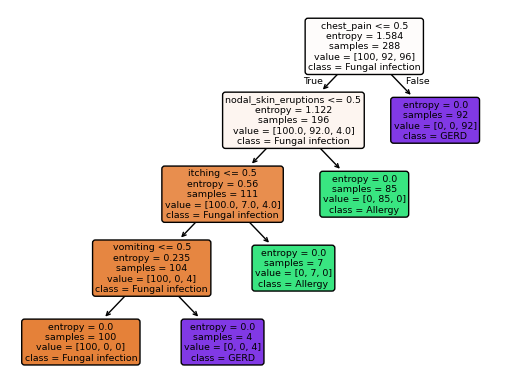

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(final_model, filled=True, feature_names=X_binary.columns, class_names=y_binary.unique(), rounded=True)

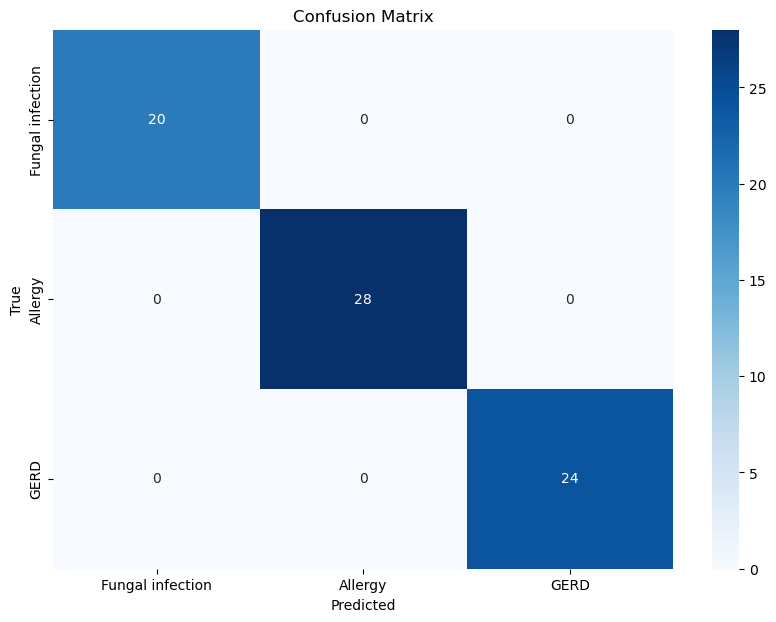

In [20]:
# matrix
from sklearn.metrics import confusion_matrix

import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_test_bin, predictions)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_binary.unique(), yticklabels=y_binary.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Save the model
